In [1]:
import numpy as np
import math as mt
import matplotlib
import matplotlib.pyplot as plt
import networkx as nx
import scipy.special as scp
from scipy.special import expit
import numpy.random as rn
##Here we normalize gene/switch values using a logistic sigmoid (aka expit function)

In [2]:
mat=np.array([[0,0,0,0,1,0,0,0,0,0,0,0,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,0,0,0,0,0,0,1,0],
             [0,1,0,0,0,-1,0,0,0,0,0,0,0,0],[0,-1,0,0,-1,0,0,0,0,0,0,0,0,0], [0,0,0,1,0,-1,-1,0,0,-1,-1,-1,0,0],
             [0,-1,0,0,0,1,0,1,0,1,0,1,0,0], [0,0,0,0,0,0,0,0,-1,0,0,0,0,0], [0,0,0,0,0,0,0,-1,0,-1,0,0,1,0],
             [0,-1,0,0,0,0,-1,0,0,0,0,1,0,0], [0,0,0,0,0,0,0,0,0,0,0,0,-1,0], [0,0,0,0,0,0,1,0,0,0,0,0,-1,0],
             [0,0,0,0,0,0,0,0,1,0,0,-1,0,0], [0,0,0,0,0,0,0,0,0,0,0,-1,1,0]])

#array without cMYC/SMAD4 which would be oncogene switches
G=nx.from_numpy_array(mat, create_using=nx.DiGraph())
G.edges(data=True)

OutEdgeDataView([(0, 4, {'weight': 1}), (1, 12, {'weight': -1}), (2, 12, {'weight': 1}), (3, 1, {'weight': 1}), (3, 5, {'weight': -1}), (4, 1, {'weight': -1}), (4, 4, {'weight': -1}), (5, 3, {'weight': 1}), (5, 5, {'weight': -1}), (5, 6, {'weight': -1}), (5, 9, {'weight': -1}), (5, 10, {'weight': -1}), (5, 11, {'weight': -1}), (6, 1, {'weight': -1}), (6, 5, {'weight': 1}), (6, 7, {'weight': 1}), (6, 9, {'weight': 1}), (6, 11, {'weight': 1}), (7, 8, {'weight': -1}), (8, 7, {'weight': -1}), (8, 9, {'weight': -1}), (8, 12, {'weight': 1}), (9, 1, {'weight': -1}), (9, 6, {'weight': -1}), (9, 11, {'weight': 1}), (10, 12, {'weight': -1}), (11, 6, {'weight': 1}), (11, 12, {'weight': -1}), (12, 8, {'weight': 1}), (12, 11, {'weight': -1}), (13, 11, {'weight': -1}), (13, 12, {'weight': 1})])

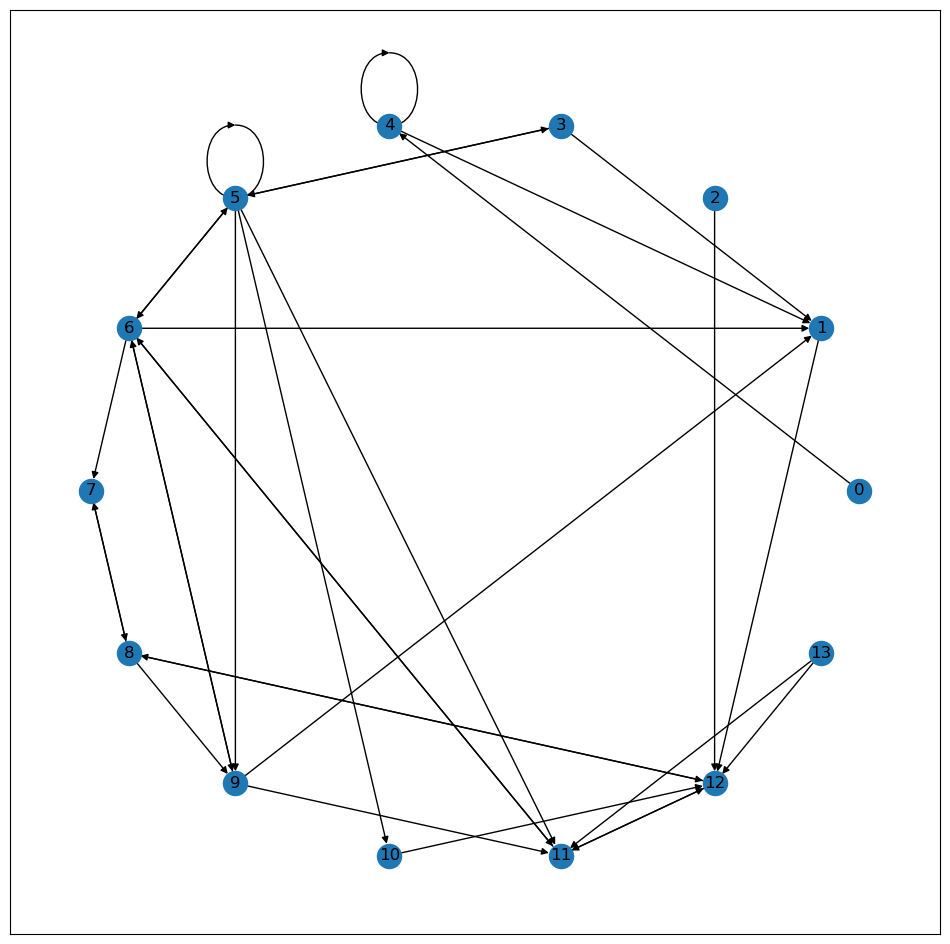

In [3]:
pos = nx.circular_layout(G)
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, pos)


In [4]:
#[G.edges(1)][0]
for i in G.in_edges(13):
    print(i)
    print(G.get_edge_data(*i)["weight"])
#G.in_edges(1)
#G.neighbors(4)

In [5]:
[G.get_edge_data(*n)["weight"] for n in G.in_edges(1)]

[1, -1, -1, -1]

In [6]:
##initalization parameters
# Define the initial phases of the oscillators
theta_init = np.random.uniform(0, 2*np.pi, 3)
##define initial switch state
#x_t_init = np.random.normal(0, 10, N)

# Define the time step and the number of time steps
dt = 0.01
secs=100  ###number of "real time" seconds to simulate
T = int(secs/dt)  #number of steps needed= real time seconds/time step; 100/0.01=10000 total steps

k_deact=1 ##deactivation rate of p53
k_creation=1  ##creation rate of p16-Ink4 and Hes1
A=(2*np.pi/12) ##freq of light cycles
k_light=1 ## coupling to light
omega=(2*np.pi/24) ##frequency of CC and CO from Masuda et al
B=((0.16)/24) ##frequency of metabolic oscillations
k_CDK1_CyclinB_CC1=-4 ##effect of cell cycle on Cyclin B
k_CDK1_CyclinB_CC2=4 ##effect of cell cycle on Cyclin B
k_CO_BMAL1=2 ##effect of Circadian cycle on BMAL1
k_met_cel=1 ##effect of metabolism on CC
k_CO_Wee1=-1 ##Circadian negative regulation of Wee

KRAS_t=np.random.uniform(low=-1,high=1, size=T)
Effector_X_Myeov_t=np.random.uniform(low=-1,high=1, size=T)
KRAS_H=np.heaviside(KRAS_t, 0.5)
Effector_X_Myeov_H=np.heaviside(Effector_X_Myeov_t, 0.5)

print(KRAS_H)
print(Effector_X_Myeov_H)





[1. 0. 1. ... 1. 0. 0.]
[1. 0. 0. ... 1. 1. 0.]


In [78]:
##avogadro's number
NA=6.022e23
##write out the equations

##KRAS is Heaviside function Node2
##EffectorX is Heaviside function node 0

# Define the array to store the data at each time step
Met_t = np.zeros(T)
CC_t = np.zeros(T)
CO_t = np.zeros(T)
P53_t = np.zeros(T)
Hes1_t = np.zeros(T)
Per1_2_t = np.zeros(T)
BMAL1_t = np.zeros(T)
Wee1_t = np.zeros(T)
Reverb_AB_t = np.zeros(T)
P16_Ink4_t = np.zeros(T)
Cip_Kip_t =np.zeros(T)
CDK1_CyclinB_t =np.zeros(T)
L_t =np.zeros(T)
f_CC =np.zeros(T)
f_CO1=np.zeros(T)
f_CO2=np.zeros(T)
f_met_cel=np.zeros(T)
F_hes1=np.zeros(T)


###initalization values

Met_t[0] = rn.uniform(0,1)
CC_t[0] = rn.uniform(0,1)
CO_t[0] = rn.uniform(0,1)
P53_t[0] = rn.uniform(0,1)
Hes1_t[0] = rn.uniform(0,1)
Per1_2_t[0] = rn.uniform(0,1)
BMAL1_t[0] = rn.uniform(0,1)
Wee1_t[0] = rn.uniform(0,1)
Reverb_AB_t[0] = rn.uniform(0,1)
P16_Ink4_t[0] = rn.uniform(0,1)
Cip_Kip_t[0] =rn.uniform(0,1)
CDK1_CyclinB_t[0] =rn.uniform(0,1)
L_t[0] =rn.uniform(0,1)
f_CC[0] =rn.uniform(0,1)
f_CO1[0]=rn.uniform(0,1)
f_CO2[0]=rn.uniform(0,1)
f_met_cel[0]=rn.uniform(0,1)
F_hes1[0]=rn.uniform(0,1)


# Run the simulation
##Here have the Ks equal to the adjacency matrix weights 
for t in range(1, T): 
        #light cycles vs time
        L_t[t]= np.cos(A*t)
        k_weight1=[G.get_edge_data(*n)["weight"] for n in G.in_edges(1)]
        ##rate of change with time
        ##node1
        Cip_Kip_t[t]= scp.expit(Cip_Kip_t[t-1] + dt*(k_weight1[0]*P53_t[t-1] +k_weight1[1]*Hes1_t[t-1] + k_weight1[2]*BMAL1_t[t-1] + k_weight1[3]*Reverb_AB_t[t-1]))
        #node3
        k_weight3=[G.get_edge_data(*n)["weight"] for n in G.in_edges(3)]
        ##rate of change with time
        ##node3
        P53_t[t]=scp.expit(P53_t[t-1] + dt*(k_weight3[0]*Per1_2_t[t-1] -k_deact))
        #node4
        k_weight4=[G.get_edge_data(*n)["weight"] for n in G.in_edges(4)]
        Hes1_t[t]=scp.expit(Hes1_t[t-1] + dt*(k_weight4[0]*F_hes1[t-1] + k_weight4[1]*Hes1_t[t-1] + k_creation))
        #node5
        k_weight5=[G.get_edge_data(*n)["weight"] for n in G.in_edges(5)]
        Per1_2_t[t]=scp.expit(Per1_2_t[t-1] + dt*(k_weight5[0]*P53_t[t-1] + k_weight5[1]*Per1_2_t[t-1] + k_weight5[2]*BMAL1_t[t-1] -f_CO1[t-1])) 
        #node6
        k_weight6=[G.get_edge_data(*n)["weight"] for n in G.in_edges(6)]
        BMAL1_t[t]=scp.expit(BMAL1_t[t-1] + dt*(k_weight6[0]*Per1_2_t[t-1] + k_weight6[1]*Reverb_AB_t[t-1] + k_weight6[2]*f_CO1[t-1]))
        #node7
        k_weight7=[G.get_edge_data(*n)["weight"] for n in G.in_edges(7)]
        Wee1_t[t]=scp.expit(Wee1_t[t-1] + dt*(k_weight7[0]*BMAL1_t[t-1] + k_weight7[1]*CDK1_CyclinB_t[t-1]) + f_CO2[t-1]) 
        #node8
        k_weight8=[G.get_edge_data(*n)["weight"] for n in G.in_edges(8)]
        CDK1_CyclinB_t[t]=scp.expit(CDK1_CyclinB_t[t-1]+ dt*(k_weight8[0]*Wee1_t[t-1] + k_weight8[1]*f_CC[t-1]))
        #node9
        k_weight9=[G.get_edge_data(*n)["weight"] for n in G.in_edges(9)]
        Reverb_AB_t[t]=scp.expit(Reverb_AB_t[t-1] + dt*(k_weight9[0]*Per1_2_t[t-1] + k_weight9[1]*BMAL1_t[t-1] + k_weight9[2]*CDK1_CyclinB_t[t-1] -f_CO1[t-1]))
        #node10
        k_weight10=[G.get_edge_data(*n)["weight"] for n in G.in_edges(10)]
        P16_Ink4_t[t]=scp.expit(P16_Ink4_t[t-1] + dt*(k_weight10[0]*Per1_2_t[t-1] + k_creation )) #k_weight10[0]
        #node11
        k_weight11=[G.get_edge_data(*n)["weight"] for n in G.in_edges(11)]
        CO_t[t]= (CO_t[t-1] + dt*(omega+ k_weight11[0]*Per1_2_t[t-1] + k_weight11[1]*BMAL1_t[t-1] + k_weight11[2]*Reverb_AB_t[t-1] + 0.01*np.sin(CC_t[t-1]-(CO_t[t-1])) + k_light*np.sin(L_t[t-1]-CO_t[t-1])))%(2*np.pi) #k_weight11[4] changed -k_light
        #node12
        k_weight12=[G.get_edge_data(*n)["weight"] for n in G.in_edges(12)]
        CC_t[t]=(CC_t[t-1] + dt*(omega+ k_weight12[0]*Cip_Kip_t[t-1] + k_weight12[1]*KRAS_H[t-1] + k_weight12[2]*CDK1_CyclinB_t[t-1] + k_weight12[3]*P16_Ink4_t[t-1] + 2*np.sin(CO_t[t-1]-(CC_t[t-1])) +k_weight12[5]*f_met_cel[t-1]))%(2*np.pi) #k_weight12[4]
        ##node13
        Met_t[t]=np.sin(B*t)
        if 0 < CC_t[t] <= np.pi:
            f_CC[t]=k_CDK1_CyclinB_CC1
        else: 
            f_CC[t]=k_CDK1_CyclinB_CC2
        if 0 < CO_t[t] <= np.pi:
            f_CO1[t]=k_CO_BMAL1
        else: 
            f_CO1[t]=0
        if 0 < CO_t[t] <= np.pi:
            f_CO2[t]=0
        else: 
            f_CO2[t]=k_CO_Wee1
        if 0 < CC_t[t] <= np.pi:
            f_met_cel[t]=0
        else: 
            f_met_cel[t]=k_met_cel
        if Effector_X_Myeov_H[t]<=0:
            F_hes1[t]=1
        else: 
            F_hes1[t]=0 

In [79]:
print(k_weight12[4])
print(k_weight11[4])

-1
-1


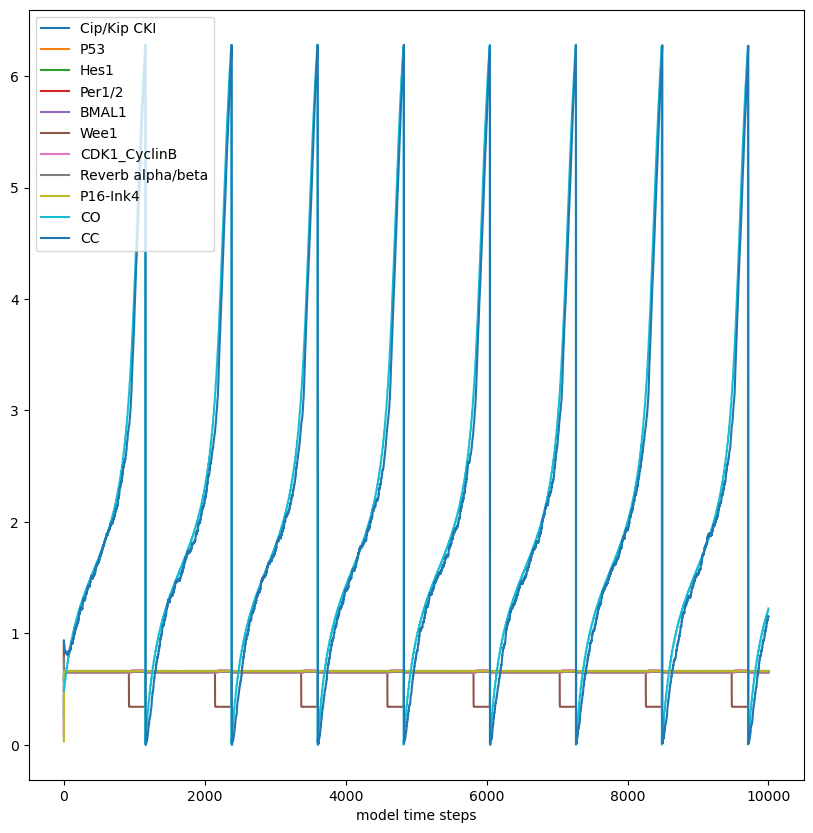

In [80]:
# Plot the the simulation

f,ax=plt.subplots(figsize=(10,10))



#plt.plot(L_t, label="Light")
plt.plot(Cip_Kip_t, label="Cip/Kip CKI")
plt.plot(P53_t, label="P53")
plt.plot(Hes1_t, label="Hes1")
plt.plot(Per1_2_t, label="Per1/2")
plt.plot(BMAL1_t, label="BMAL1")
plt.plot(Wee1_t, label="Wee1")
plt.plot(CDK1_CyclinB_t, label="CDK1_CyclinB")
plt.plot(Reverb_AB_t, label="Reverb alpha/beta")
plt.plot(P16_Ink4_t, label="P16-Ink4")
plt.plot(CO_t, label="CO")
plt.plot(CC_t, label="CC")
#plt.plot(Met_t, label="Met")
plt.xlabel('model time steps')
#plt.ylabel('Phase')
#plt.yscale('log')
plt.legend()
#plt.ylim(0, 2*np.pi)
plt.show()

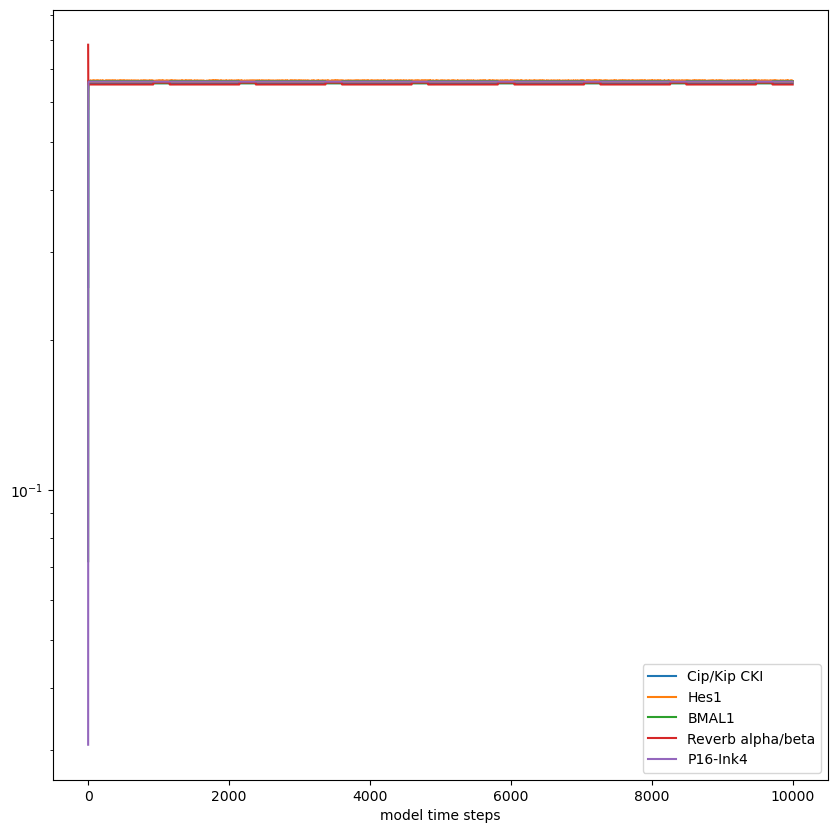

In [117]:
# Plot the the simulation

f,ax=plt.subplots(figsize=(10,10))



#plt.plot(L_t, label="Light")
plt.plot(Cip_Kip_t, label="Cip/Kip CKI")
#plt.plot(P53_t, label="P53")
plt.plot(Hes1_t, label="Hes1")
#plt.plot(Per1_2_t, label="Per1/2")
plt.plot(BMAL1_t, label="BMAL1")
#plt.plot(Wee1_t, label="Wee1")
#plt.plot(CDK1_CyclinB_t, label="CDK1_CyclinB")
plt.plot(Reverb_AB_t, label="Reverb alpha/beta")
plt.plot(P16_Ink4_t, label="P16-Ink4")
#plt.ylim((0,1.25))
#plt.plot(KRAS_H, label="KRAS")
#plt.plot(CO_t, label="CO")
#plt.plot(CC_t, label="CC")
#plt.plot(Met_t, label="Met")
plt.xlabel('model time steps')
#plt.ylabel('Phase')
plt.yscale('log')
plt.legend()
#plt.ylim(0, 2*np.pi)
plt.show()


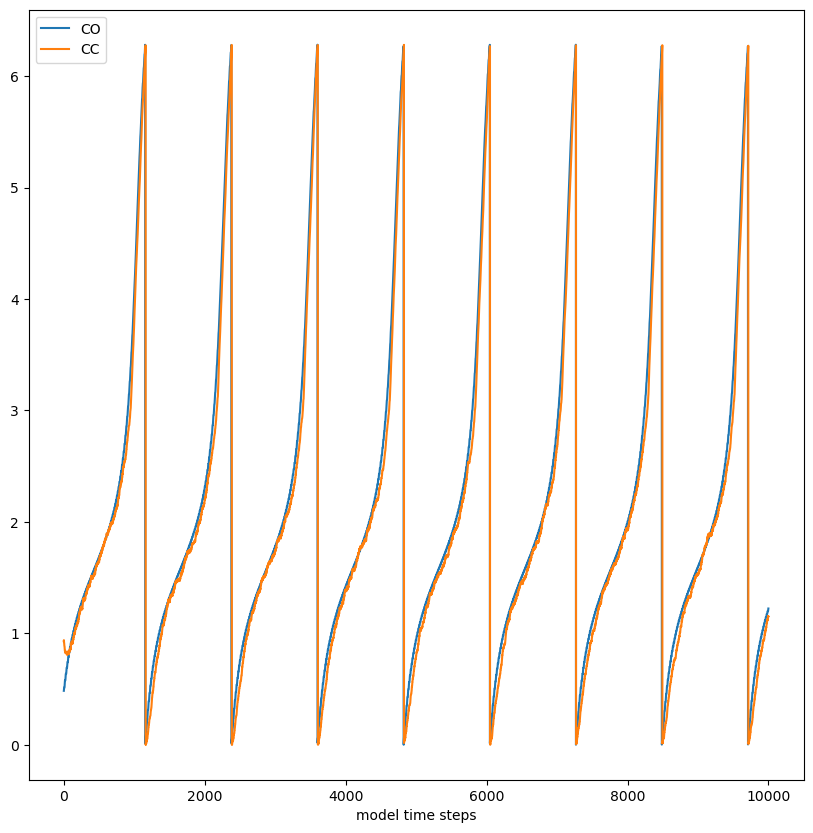

In [82]:
# Plot the the simulation

f,ax=plt.subplots(figsize=(10,10))



#plt.plot(L_t, label="Light")
#plt.plot(Cip_Kip_t, label="Cip/Kip CKI")
#plt.plot(P53_t, label="P53")
#plt.plot(Hes1_t, label="Hes1")
#plt.plot(Per1_2_t, label="Per1/2")
#plt.plot(BMAL1_t, label="BMAL1")
#plt.plot(Wee1_t, label="Wee1")
#plt.plot(CDK1_CyclinB_t, label="CDK1_CyclinB")
#plt.plot(Reverb_AB_t, label="Reverb alpha/beta")
#plt.plot(P16_Ink4_t, label="P16-Ink4")
#plt.plot(KRAS_H, label="KRAS")
#plt.plot(Effector_X_Myeov_H, label="EffectorX-MYEOV")
plt.plot(CO_t, label="CO")
plt.plot(CC_t, label="CC")
#plt.plot(Met_t, label="Met")
plt.xlabel('model time steps')
#plt.ylabel('Phase')
#plt.yscale('log')
plt.legend()
#plt.ylim(0, 2*np.pi)
plt.show()

In [83]:
print(min(P16_Ink4_t))
print(max(P16_Ink4_t))

#print(min(Wee1_t)/(6.022e23))

0.030808770456173917
0.6600557239438405


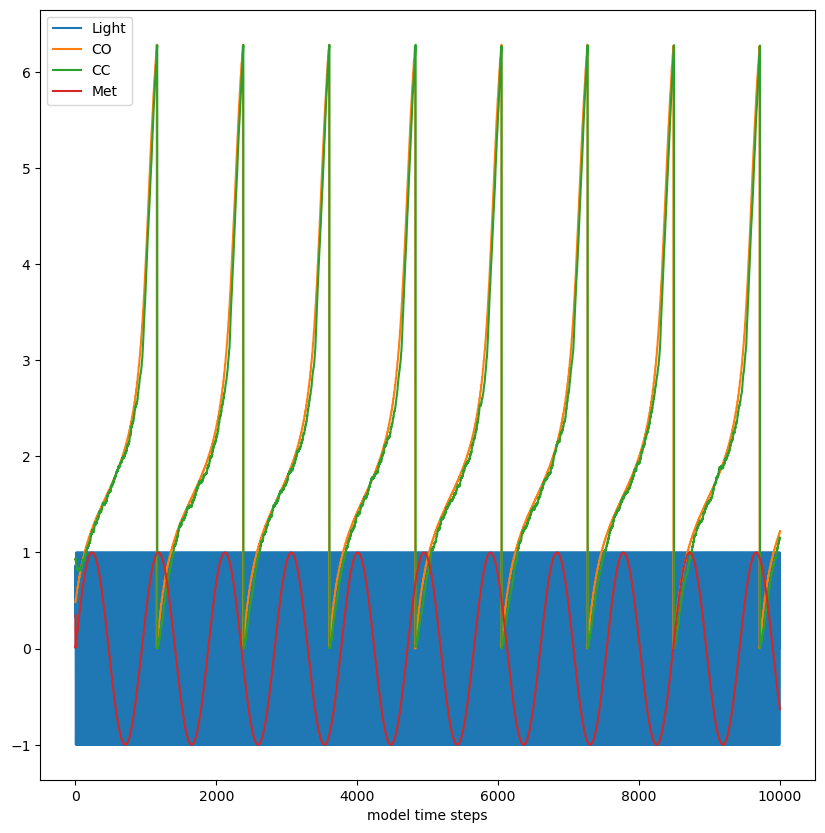

In [84]:
f,ax=plt.subplots(figsize=(10,10))



plt.plot(L_t, label="Light")
#plt.plot(Cip_Kip_t, label="Cip/Kip CKI")
#plt.plot(P53_t, label="P53")
#plt.plot(Hes1_t, label="Hes1")
#plt.plot(Per1_2_t, label="Per1/2")
#plt.plot(BMAL1_t, label="BMAL1")
#plt.plot(Wee1_t, label="Wee1")
#plt.plot(CDK1_CyclinB_t, label="CDK1_CyclinB")
#plt.plot(Reverb_AB_t, label="Reverb alpha/beta")
#plt.plot(P16_Ink4_t, label="P16-Ink4")
plt.plot(CO_t, label="CO")
plt.plot(CC_t, label="CC")
plt.plot(Met_t, label="Met")
plt.xlabel('model time steps')
#plt.ylabel('Phase')
#plt.yscale('log')
plt.legend()
#plt.ylim(0, 2*np.pi)
plt.show()

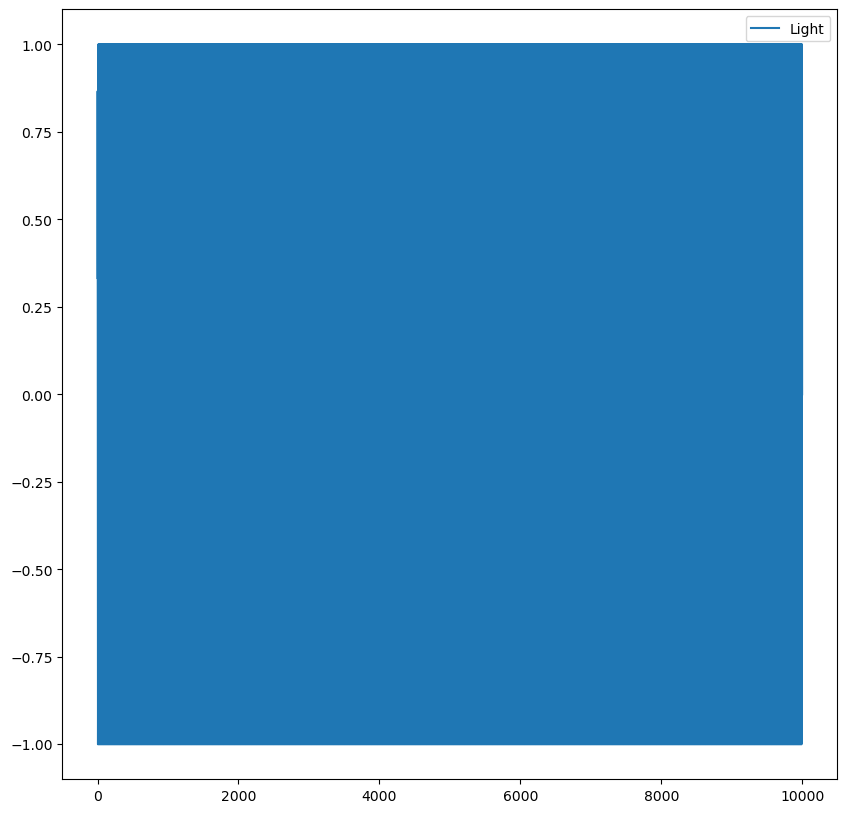

In [85]:
f,ax=plt.subplots(figsize=(10,10))



plt.plot(L_t, label="Light")
#plt.plot(Cip_Kip_t, label="Cip/Kip CKI")
#plt.plot(P53_t, label="P53")
#plt.plot(Hes1_t, label="Hes1")
#plt.plot(Per1_2_t, label="Per1/2")
#plt.plot(BMAL1_t, label="BMAL1")
#plt.plot(Wee1_t, label="Wee1")
#plt.plot(CDK1_CyclinB_t, label="CDK1_CyclinB")
#plt.plot(Reverb_AB_t, label="Reverb alpha/beta")
#plt.plot(P16_Ink4_t, label="P16-Ink4")
#plt.plot(CO_t, label="CO")
#plt.plot(CC_t, label="CC")
#plt.plot(Met_t, label="Met")
#plt.xlabel('model time steps')
#plt.ylabel('Phase')
#plt.yscale('log')
plt.legend()
#plt.ylim(0, 2*np.pi)
plt.show()

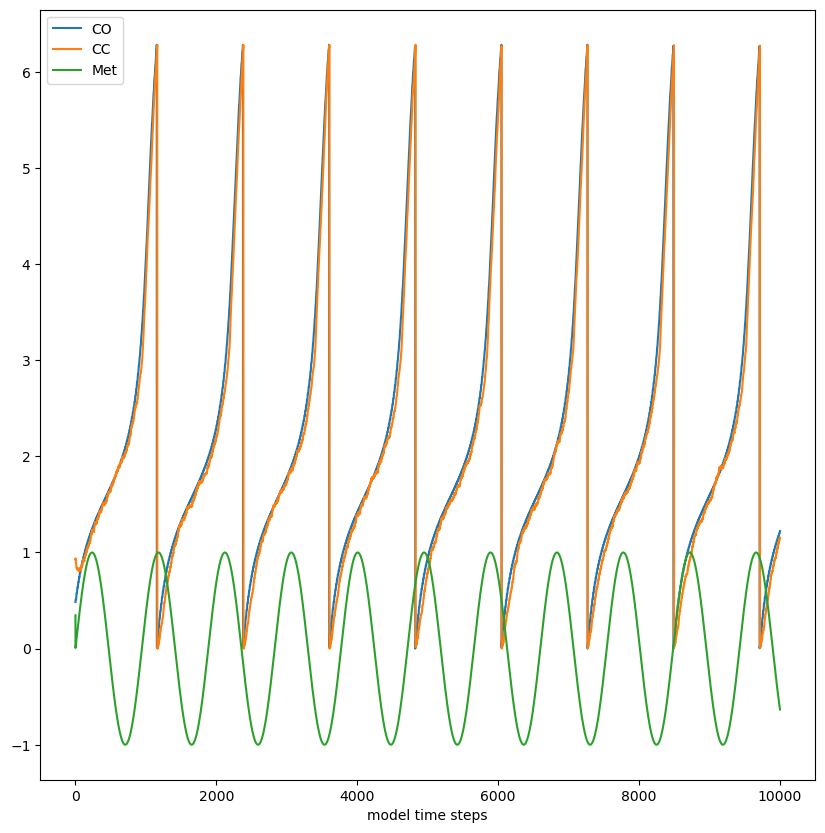

In [86]:
f,ax=plt.subplots(figsize=(10,10))



#plt.plot(L_t, label="Light")
#plt.plot(Cip_Kip_t, label="Cip/Kip CKI")
#plt.plot(P53_t, label="P53")
#plt.plot(Hes1_t, label="Hes1")
#plt.plot(Per1_2_t, label="Per1/2")
#plt.plot(BMAL1_t, label="BMAL1")
#plt.plot(Wee1_t, label="Wee1")
#plt.plot(CDK1_CyclinB_t, label="CDK1_CyclinB")
#plt.plot(Reverb_AB_t, label="Reverb alpha/beta")
#plt.plot(P16_Ink4_t, label="P16-Ink4")
plt.plot(CO_t, label="CO")
plt.plot(CC_t, label="CC")
plt.plot(Met_t, label="Met")
plt.xlabel('model time steps')
#plt.ylabel('Phase')
#plt.yscale('log')
plt.legend()
#plt.ylim(0, 2*np.pi)
plt.show()

(10000, 2)
(10000,)


Text(0, 0.5, 'psi average phase angle')

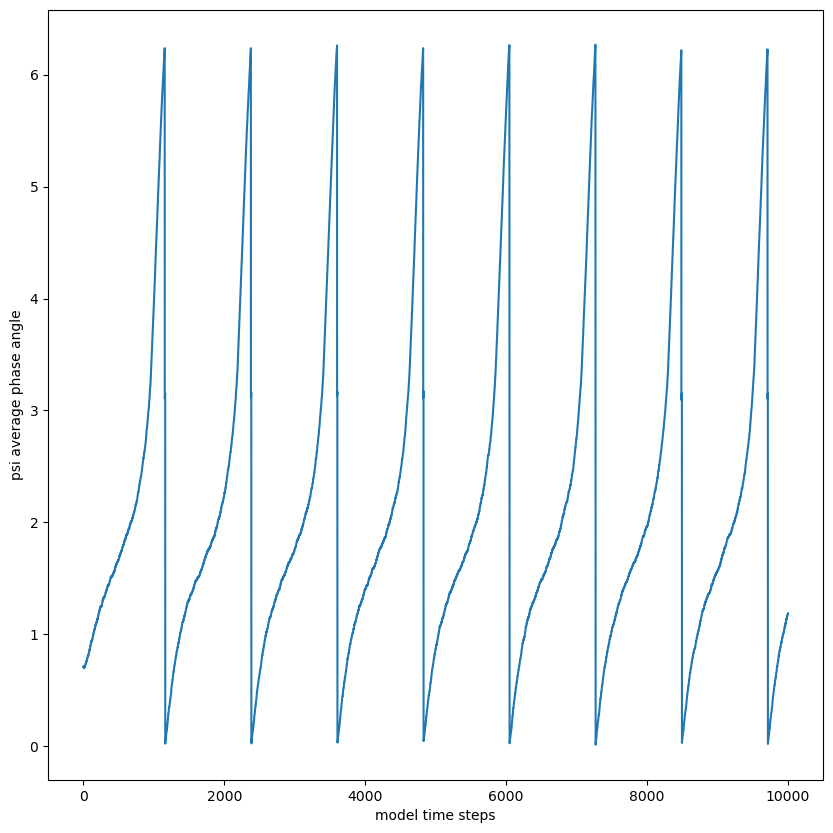

In [106]:
##calculate the average phase and compute order parameters
all_oscillators=np.array([CC_t, CO_t]).transpose()
print(np.shape(all_oscillators))
psi=np.mean(all_oscillators, axis=1)
print(np.shape(psi))

f,ax=plt.subplots(figsize=(10,10))


plt.plot(psi)
plt.xlabel('model time steps')
plt.ylabel('psi average phase angle')

In [107]:
print(all_oscillators[100][:2])

[0.8760309  0.91573429]


In [108]:
print(all_oscillators[100])

[0.8760309  0.91573429]


In [109]:
##compute the order parameter(s) at each model timestep
r_theta_list = []


for t in range(T):
        #print(t)
        ##for this order parameter, we sum over all oscillator frequencies at a given time
        #print(np.sum(np.exp(1j*theta_t_pie[t])))
        #print(np.exp(1j*psi[t]))
        r_theta=abs((1/2)*np.sum(np.exp(1j*all_oscillators[t][:2])))
        #print(r_theta)
        r_theta_list.append(r_theta)

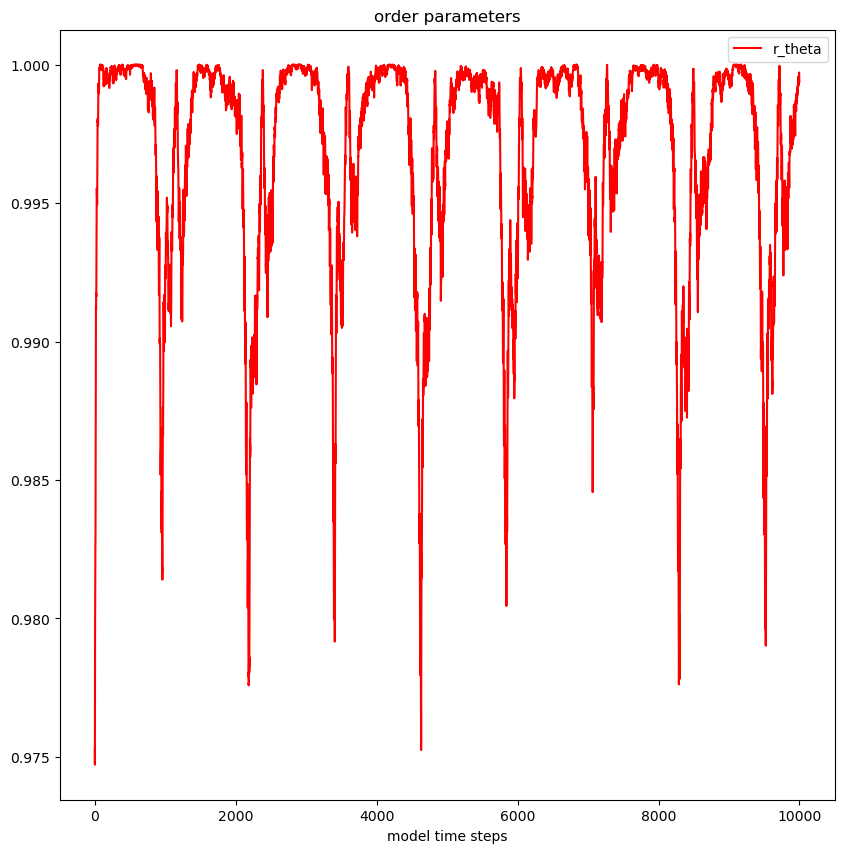

In [110]:
##plot the order parameters

f,ax=plt.subplots(figsize=(10,10))
plt.plot(r_theta_list,'r', label='r_theta')
#plt.plot(r_x_list,'b', label='r_x')
#plt.plot(r_link_t, 'm', label='r_link')
plt.legend()

plt.title('order parameters')
plt.xlabel('model time steps')
#plt.ylabel('r theta')
plt.show()